In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 127 images belonging to 3 classes.


In [6]:

def create_model(model_name, num_classes):
    if model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
model_names = ['VGG16', 'ResNet50', 'InceptionV3']
num_classes = 3  

results = {}

for model_name in model_names:
    print(f'Training {model_name}...')
    model = create_model(model_name, num_classes)
    
    history = model.fit(train_generator, 
                        validation_data=train_generator, 
                        epochs=10, 
                        verbose=1)
    
    results[model_name] = history


Training VGG16...


c:\Users\akshi\Desktop\imagClassifier\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 19s/step - accuracy: 0.3582 - loss: 5.5335 - val_accuracy: 0.3622 - val_loss: 1.1154
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 19s/step - accuracy: 0.3518 - loss: 1.2153 - val_accuracy: 0.4724 - val_loss: 1.1051
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 73s 20s/step - accuracy: 0.3761 - loss: 1.1733 - val_accuracy: 0.3622 - val_loss: 1.3470
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 19s/step - accuracy: 0.2961 - loss: 1.2315 - val_accuracy: 0.3543 - val_loss: 1.0989
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 21s/step - accuracy: 0.3003 - loss: 1.1082 - val_accuracy: 0.3701 - val_loss: 1.0872
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 19s/step - accuracy: 0.3803 - loss: 1.0958 - val_accuracy: 0.4094 - val_loss: 1.0788
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 18s/step - accuracy: 0.4063 - loss: 1.0798 - val_accuracy: 0.3622 - val_loss: 1.0755
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 18s/step - accuracy: 0.4066 - loss: 1.0712 - val_accuracy: 0.5039 - val_loss: 1.0607


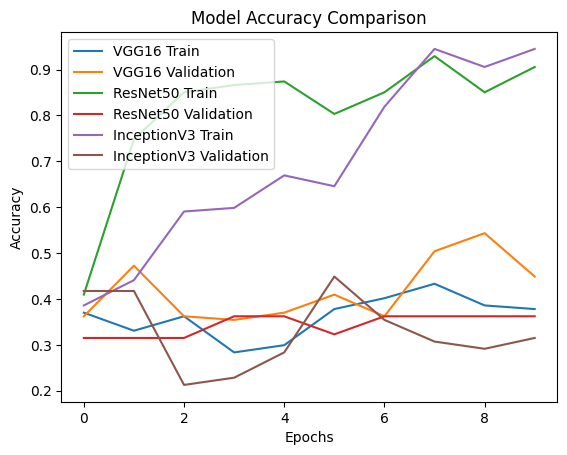

In [9]:
import matplotlib.pyplot as plt

def plot_results(results):
    for model_name, history in results.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} Train')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation')
    
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_results(results)



Evaluating VGG16...
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

Confusion Matrix for VGG16:
[[ 2  0 38]
 [ 4  2 35]
 [ 1  0 45]]

Classification Report for VGG16:

              precision    recall  f1-score   support

     leopard       0.29      0.05      0.09        40
        lion       1.00      0.05      0.09        41
       tiger       0.38      0.98      0.55        46

    accuracy                           0.39       127
   macro avg       0.56      0.36      0.24       127
weighted avg       0.55      0.39      0.26       127



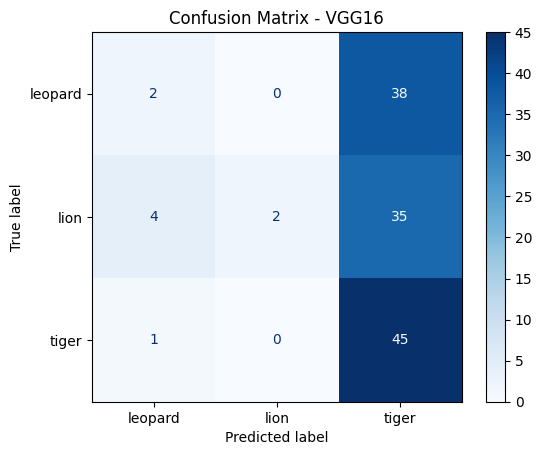


Evaluating ResNet50...
3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000219105C49A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step

Confusion Matrix for ResNet50:
[[ 0 40  0]
 [ 0 41  0]
 [ 0 46  0]]

Classification Report for ResNet50:

              precision    recall  f1-score   support

     leopard    

c:\Users\akshi\Desktop\imagClassifier\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\akshi\Desktop\imagClassifier\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\akshi\Desktop\imagClassifier\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

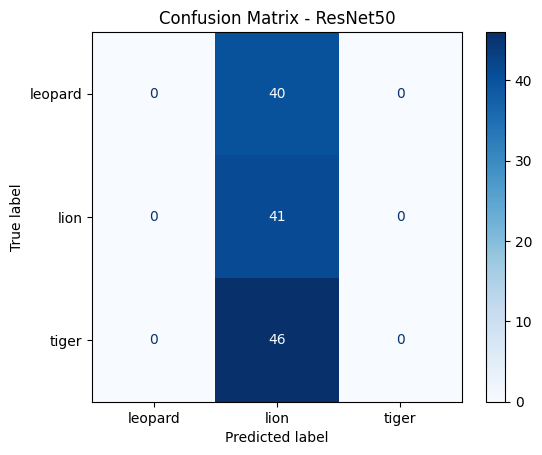


Evaluating InceptionV3...
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step  

Confusion Matrix for InceptionV3:
[[ 5  0 35]
 [ 6  1 34]
 [ 6  1 39]]

Classification Report for InceptionV3:

              precision    recall  f1-score   support

     leopard       0.29      0.12      0.18        40
        lion       0.50      0.02      0.05        41
       tiger       0.36      0.85      0.51        46

    accuracy                           0.35       127
   macro avg       0.39      0.33      0.24       127
weighted avg       0.38      0.35      0.25       127



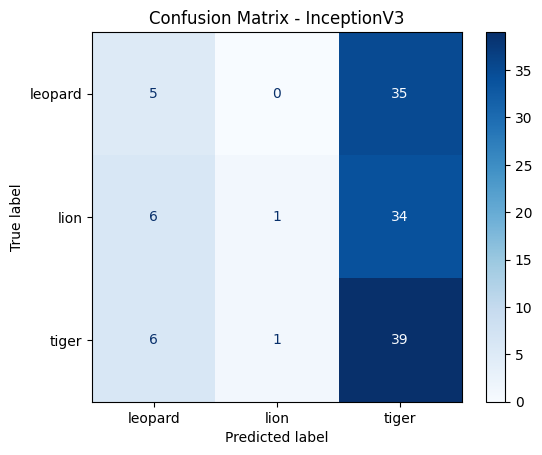

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

train_generator.reset()

for model_name in model_names:
    print(f'\nEvaluating {model_name}...')
    
    model = create_model(model_name, num_classes)

    predictions = model.predict(train_generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = train_generator.classes
    class_labels = list(train_generator.class_indices.keys())

    cm = confusion_matrix(true_classes, predicted_classes)
    print(f'\nConfusion Matrix for {model_name}:\n{cm}')

    print(f'\nClassification Report for {model_name}:\n')
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

generator = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  
    shuffle=False
)

features = base_model.predict(generator, verbose=1)
features = features.reshape(features.shape[0], -1)  
labels = generator.classes  


Found 127 images belonging to 3 classes.


c:\Users\akshi\Desktop\imagClassifier\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


In [24]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=generator.class_indices.keys()))


Confusion Matrix:
[[ 8  0  0]
 [ 0  8  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

     leopard       1.00      1.00      1.00         8
        lion       1.00      1.00      1.00         8
       tiger       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



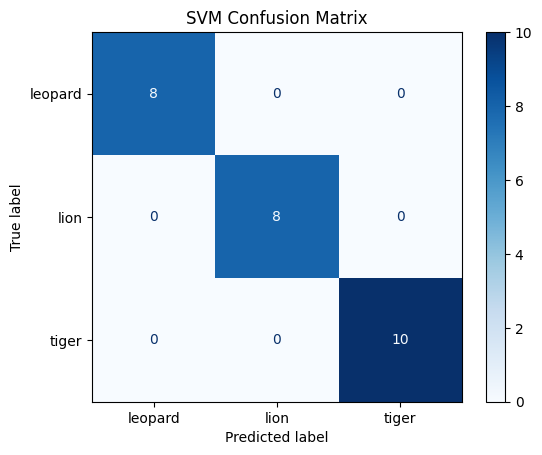

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_names = list(generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()


In [ ]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [27]:
class_dict = train_generator.class_indices
class_dict

{'leopard': 0, 'lion': 1, 'tiger': 2}

In [28]:
import json
with open('class_indices.json', 'w') as f:
    json.dump(class_dict, f)
